In [14]:
import os
import pydicom
import matplotlib.pyplot as plt
import re
import math
import numpy as np

# Path to your DICOM series folder
series_dir = r"C:\Users\tomer.erez\Desktop\code_projects\normal_near_normal\stanford_data\ctsinogram\head_ct_dataset_anon\batch_1\series_1\reconstructed_image"

# List all .dcm files
files = [f for f in os.listdir(series_dir) if f.endswith(".dcm")]
files.sort(key=lambda f: int(re.search(r"(\d+)", f).group()))
print(files)




['image_0.dcm', 'image_1.dcm', 'image_2.dcm', 'image_3.dcm', 'image_4.dcm', 'image_5.dcm', 'image_6.dcm', 'image_7.dcm', 'image_8.dcm', 'image_9.dcm', 'image_10.dcm', 'image_11.dcm', 'image_12.dcm', 'image_13.dcm', 'image_14.dcm', 'image_15.dcm', 'image_16.dcm', 'image_17.dcm', 'image_18.dcm', 'image_19.dcm', 'image_20.dcm', 'image_21.dcm', 'image_22.dcm', 'image_23.dcm', 'image_24.dcm', 'image_25.dcm', 'image_26.dcm', 'image_27.dcm', 'image_28.dcm', 'image_29.dcm', 'image_30.dcm', 'image_31.dcm']


In [15]:
# ---------------- Helpers ----------------
def window_image(ds, center=40, width=80):
    """Convert pixel_array to HU and apply windowing."""
    img = ds.pixel_array.astype(np.int16)
    # Apply rescale slope/intercept (if present)
    slope = getattr(ds, "RescaleSlope", 1)
    intercept = getattr(ds, "RescaleIntercept", 0)
    img = img * slope + intercept

    # Windowing
    lo, hi = center - width/2, center + width/2
    img = np.clip(img, lo, hi)
    img = (img - lo) / (hi - lo) * 255.0
    return img.astype(np.uint8)

In [16]:
def plot_dicom_series(files, series_dir, n_cols=5, center=40, width=80):
    """Plot a DICOM series in a grid with n_cols per row, applying windowing."""
    n_slices = len(files)
    n_rows = math.ceil(n_slices / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))

    # Make axes array always 2D
    if n_rows == 1:
        axes = np.expand_dims(axes, 0)

    for idx, fname in enumerate(files):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col]

        path = os.path.join(series_dir, fname)
        ds = pydicom.dcmread(path)

        img = window_image(ds, center=center, width=width)

        ax.imshow(img, cmap="gray")
        ax.set_title(f"Slice {idx+1}")
        ax.axis("off")

    # Hide empty subplots
    for j in range(idx+1, n_rows*n_cols):
        row, col = divmod(j, n_cols)
        axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()


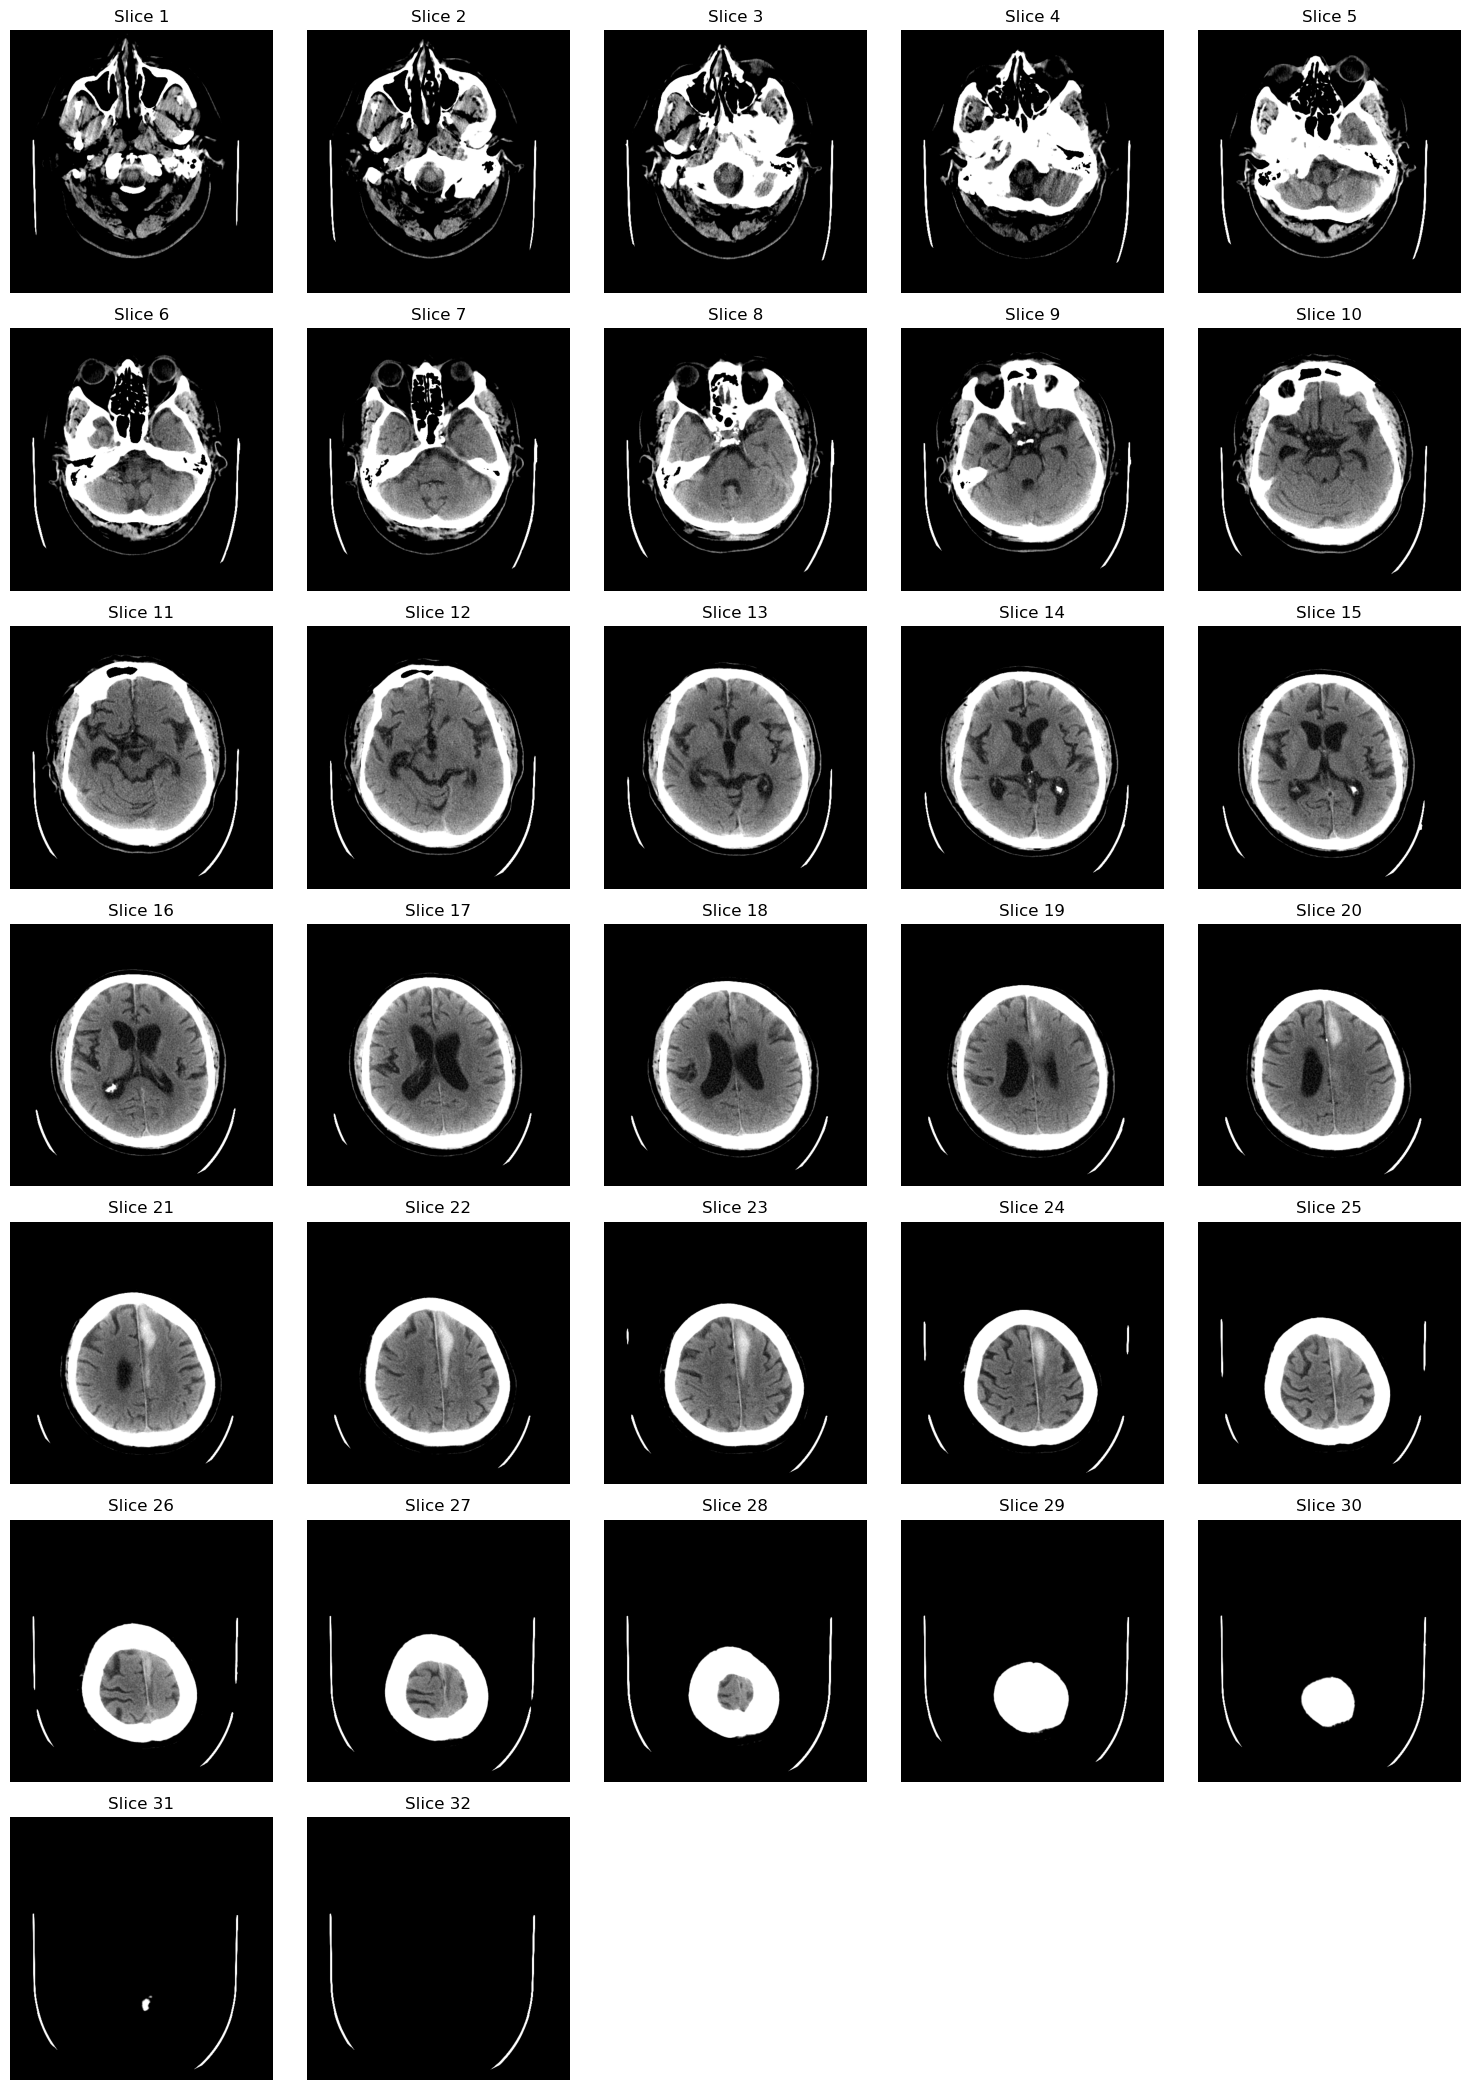

In [17]:
plot_dicom_series(files, series_dir, n_cols=5, center=40, width=80)
